In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
train_set=pd.read_csv(r"D:\courses\data science all\project\housing prices\train.csv")
test_set=pd.read_csv(r"D:\courses\data science all\project\housing prices\test.csv")

# data Exploration

In [3]:
train_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train_set["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
# train_set.describe().columns == train_set.dtypes[train_set.dtypes != "object"]

In [8]:
train_set.dtypes[train_set.dtypes != "object"]

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [9]:
len(train_set.dtypes[train_set.dtypes == "object"])

43

# detecting the Outliers

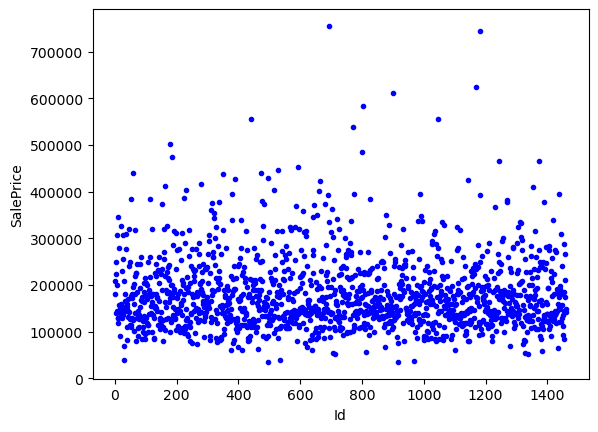

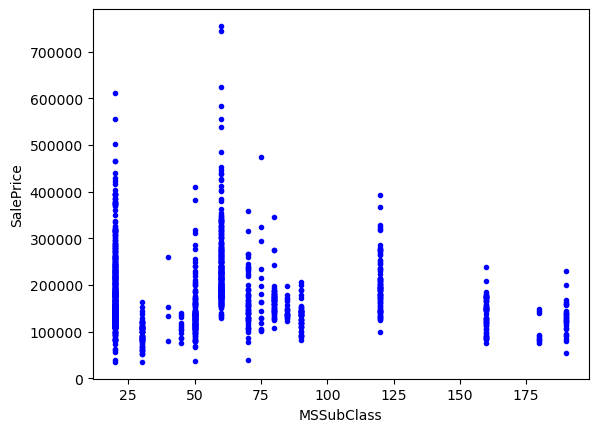

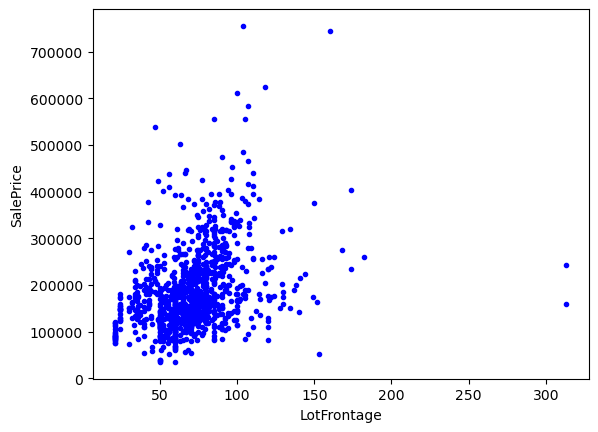

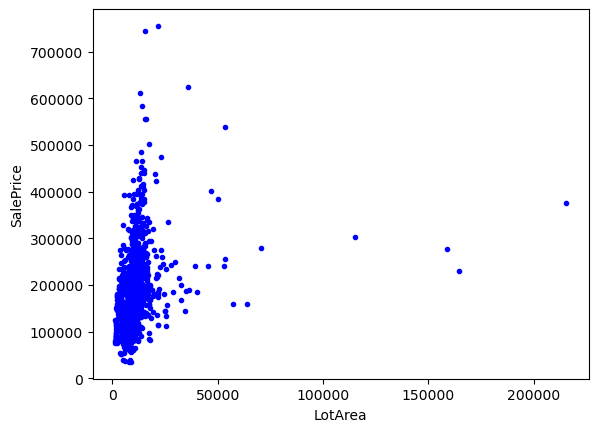

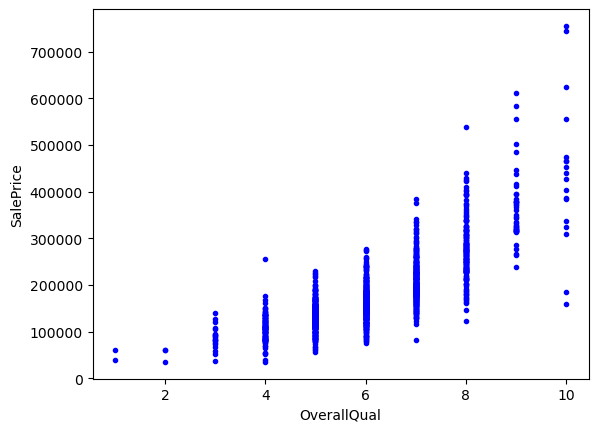

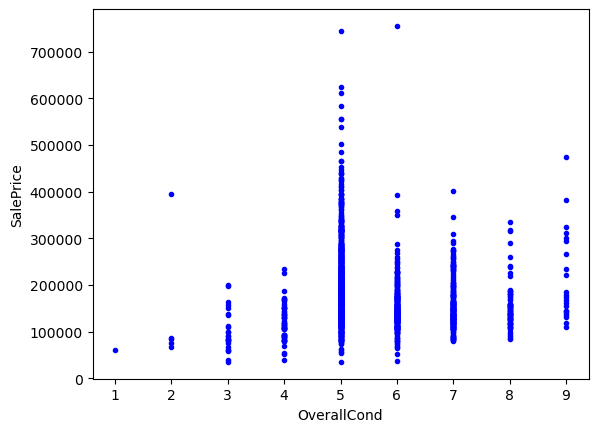

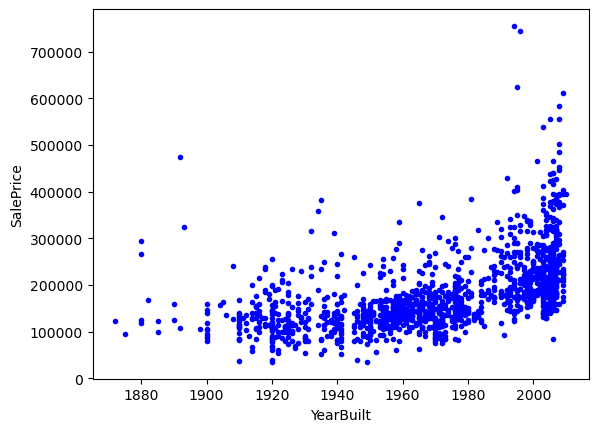

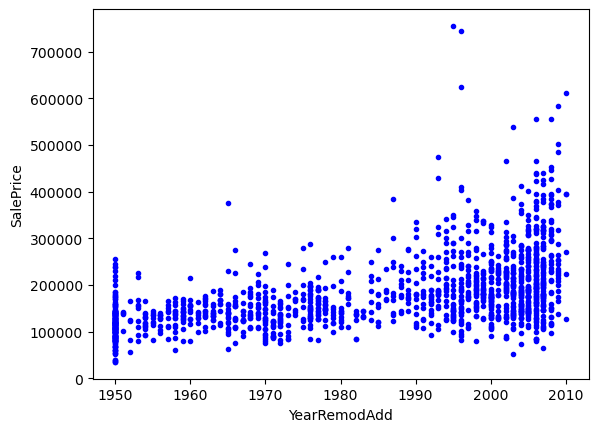

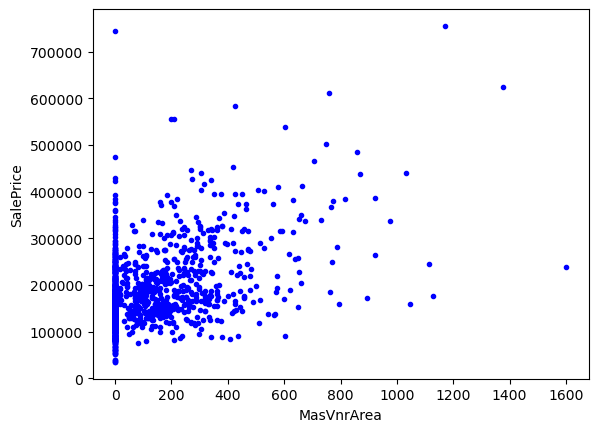

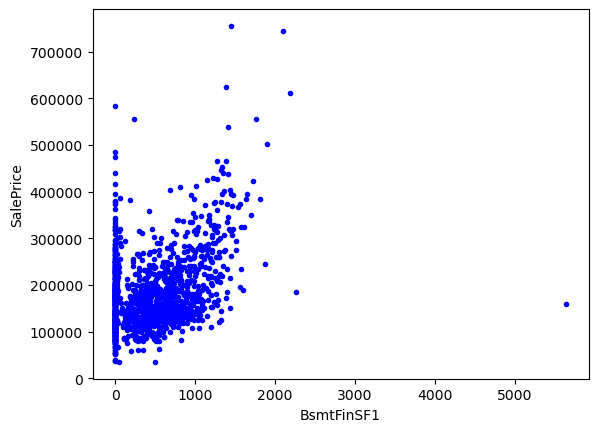

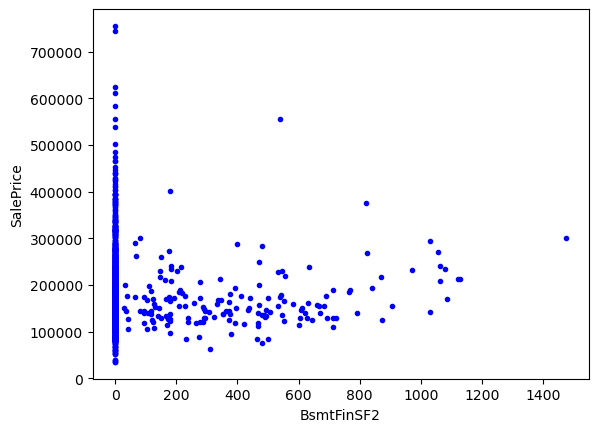

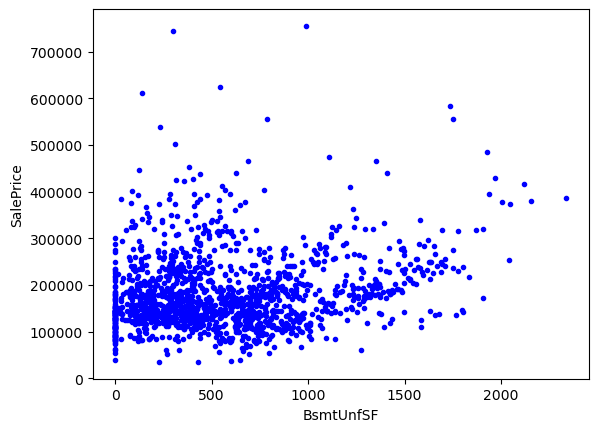

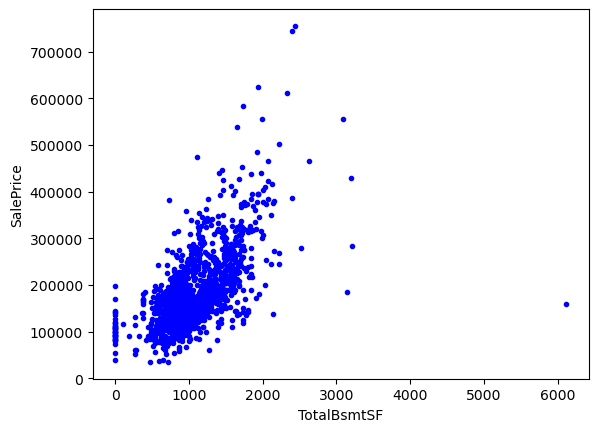

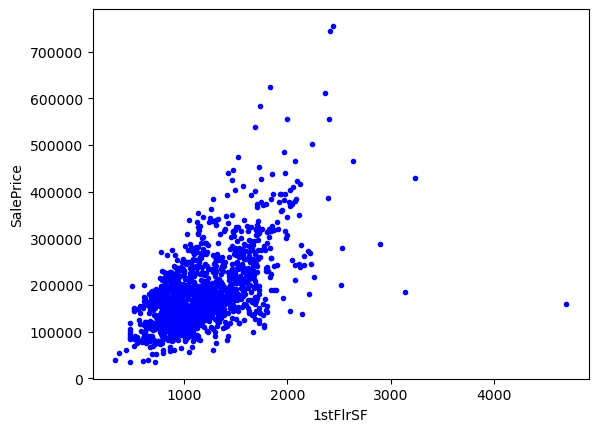

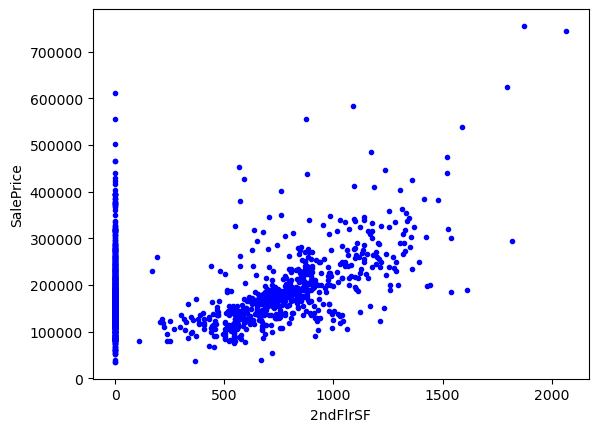

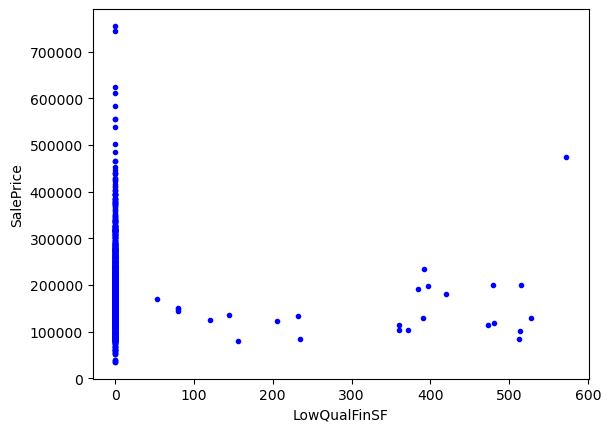

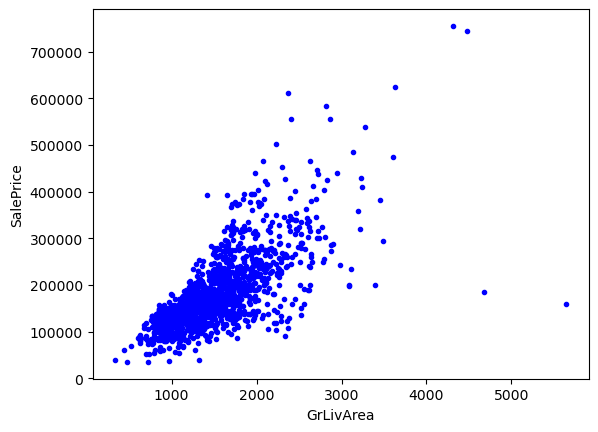

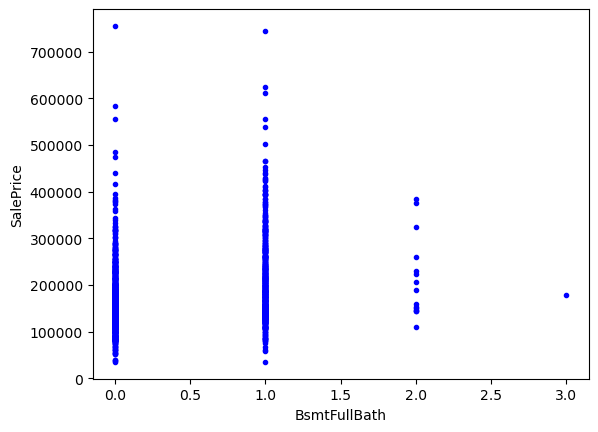

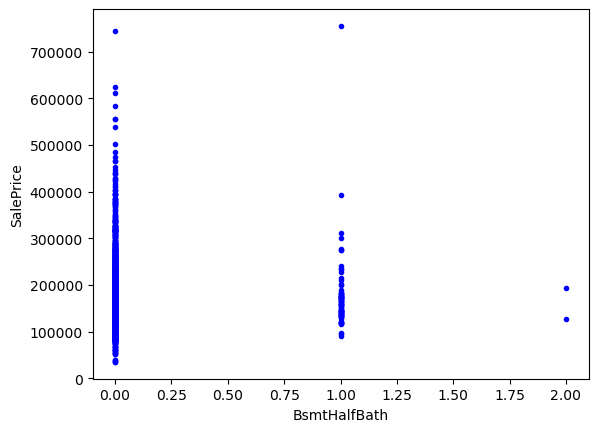

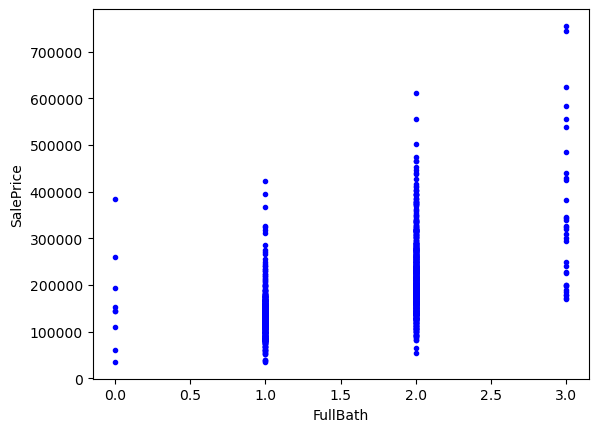

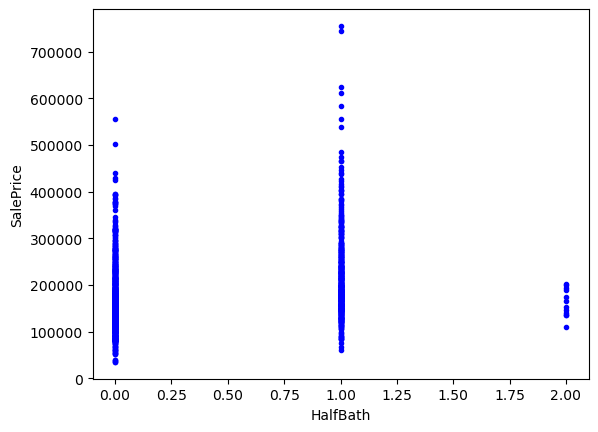

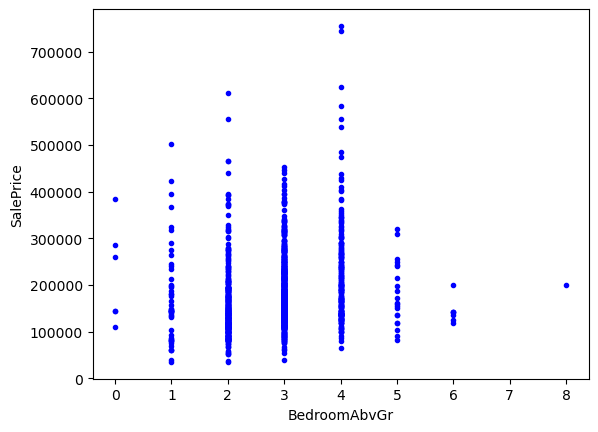

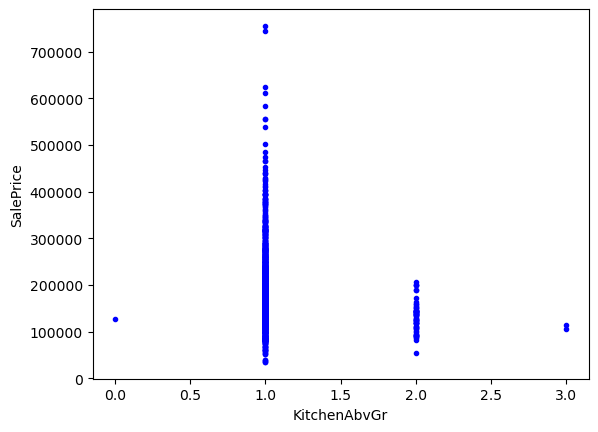

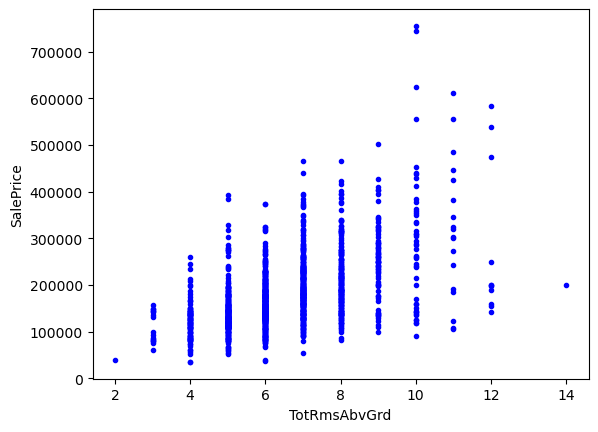

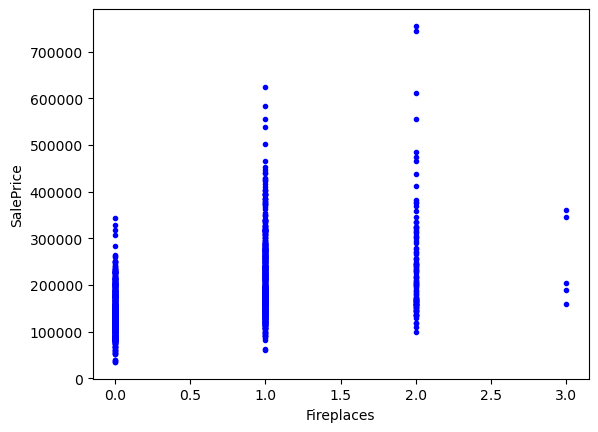

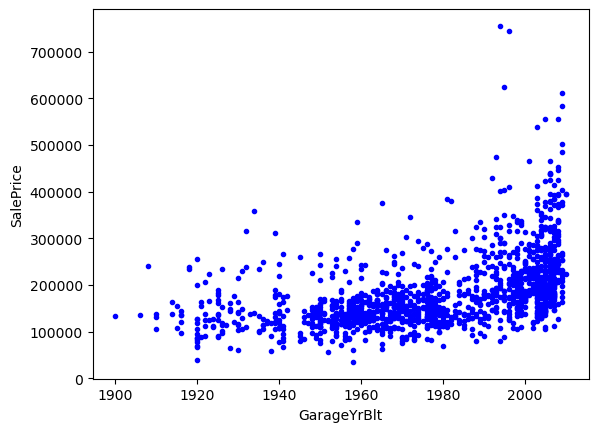

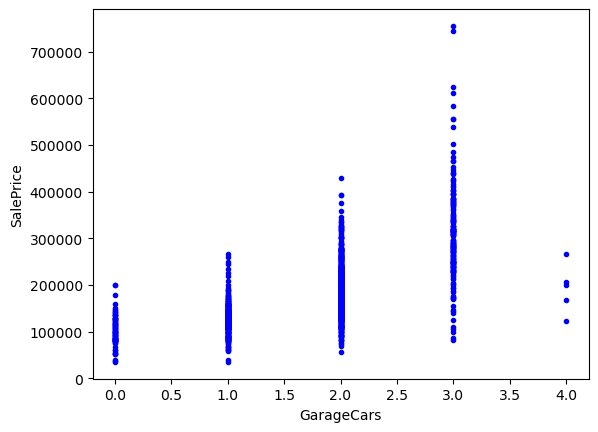

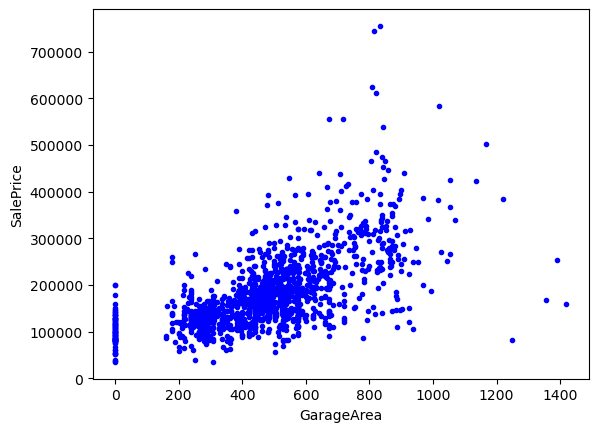

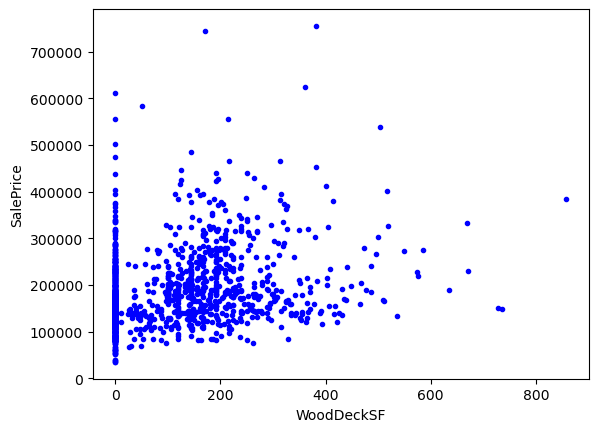

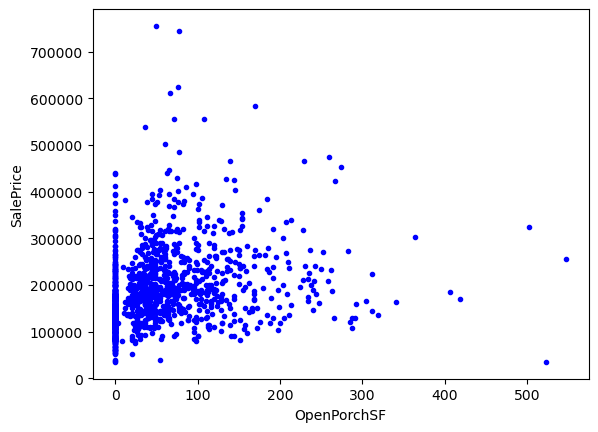

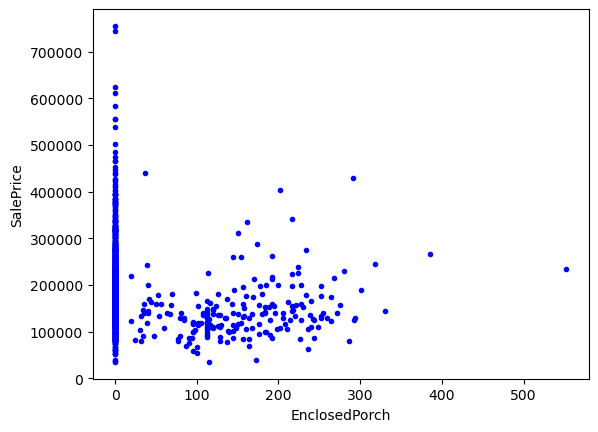

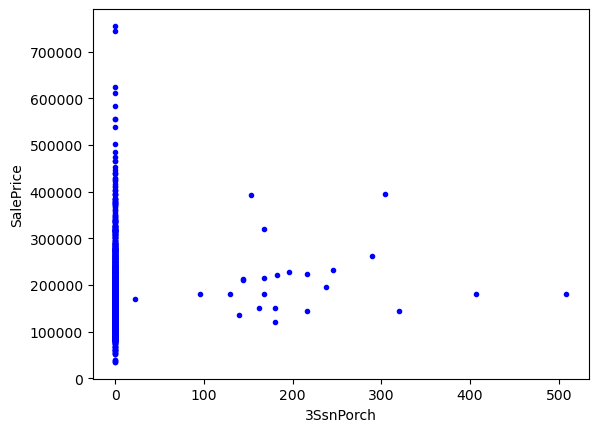

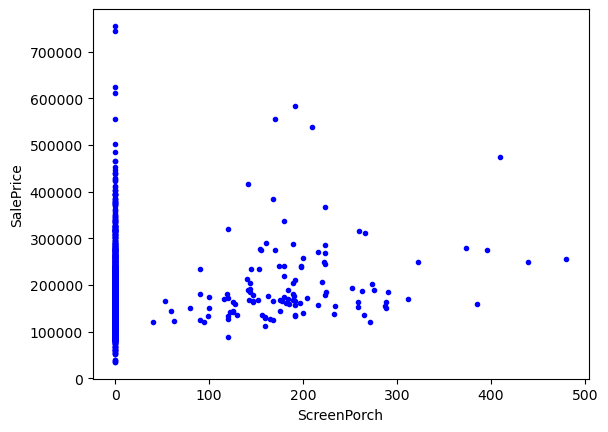

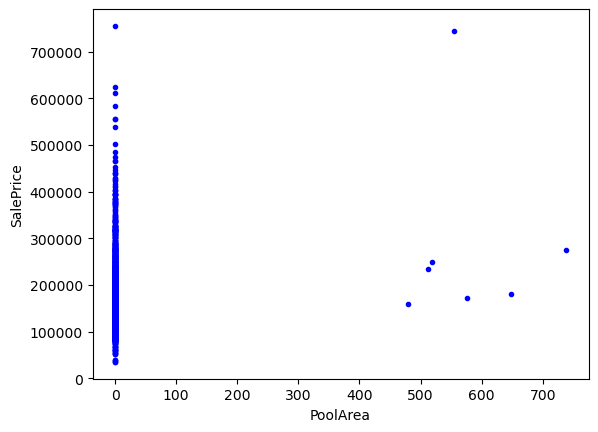

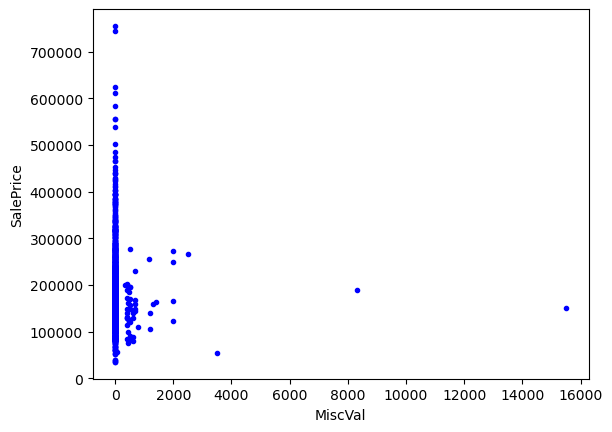

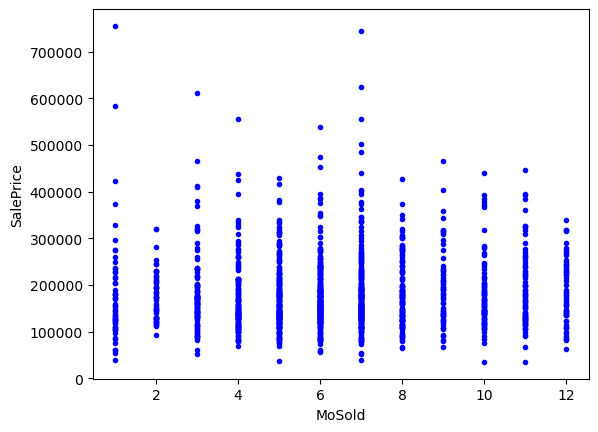

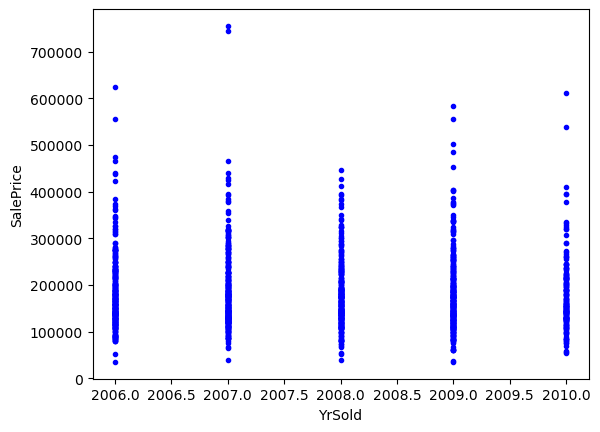

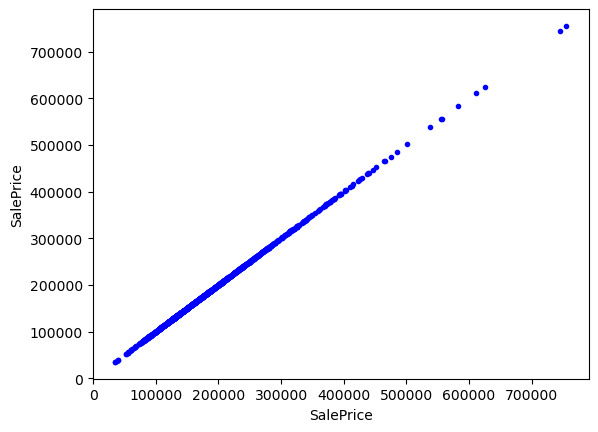

In [11]:
for i in train_set.describe().columns:
    plt.plot(train_set[i],train_set["SalePrice"],"b.")
   
    plt.xlabel(i)
    plt.ylabel("SalePrice")
   
   
    plt.show()

In [12]:
train_set.query("LotFrontage>300")
#935 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [13]:
train_set.query("LotArea > 70000")
#250 314 336 707  452

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


In [14]:
stats.zscore(train_set["LotArea"]).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

In [15]:
train_set.query("OverallQual == 10 & SalePrice < 250000")
# 524 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [16]:
train_set.query("OverallCond  == 2 & SalePrice > 300000")
# 379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432


In [17]:
train_set.query("OverallCond  >= 5 & SalePrice > 700000")
# 692  1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [18]:
train_set.query("YearBuilt  <1900 & SalePrice > 400000")
# 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [19]:
train_set.query("YearBuilt  >1980 & SalePrice > 700000")
# 692 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [20]:
train_set.query("YearRemodAdd < 1970 & SalePrice > 300000")
# 314

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000


In [21]:
train_set.query("YearRemodAdd >1990 & SalePrice > 650000")
# 692 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [22]:
train_set.query(" MasVnrArea >1500 ")
# 298

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,298,60,FV,66.0,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,239000


In [23]:
train_set.query(" BsmtFinSF1 >5000 ")
# 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [24]:
train_set.query("BsmtFinSF2 > 400  & SalePrice > 500000")
# 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [25]:
train_set.query(" TotalBsmtSF >6000 ")
# 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [26]:
# train_set.query("'1stFlrSF' > 4000 ")
train_set[train_set["1stFlrSF"]>4000]
# 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [27]:
train_set.query(" LowQualFinSF > 500 & SalePrice > 400000")
# 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


In [28]:
train_set.query(" GrLivArea > 4000 & SalePrice< 300000")
# 524 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [29]:
train_set.query(" BsmtFullBath ==3")
# 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [30]:
train_set.query("BsmtHalfBath ==2")
# 598 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [31]:
train_set.query("BedroomAbvGr ==8")
# 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [32]:
train_set.query("KitchenAbvGr == 3 | KitchenAbvGr == 0")
# 49 810 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [33]:
train_set.query("TotRmsAbvGrd ==14")
# 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [34]:
train_set.query(" GarageArea>1200 & SalePrice < 300000")
# 1062 1191 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [35]:
train_set.query(" OpenPorchSF>500")
# 584 496

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


In [36]:
train_set.query(" EnclosedPorch>500")
# 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


In [37]:
values =[935,1299,250,314,336,707,379,692,186,
         1183,524,1062,1191,636,955,598,955,739 ,441,198,496,1338,739] 

########################

In [38]:
len(values)

23

In [39]:
train_set = train_set[train_set["Id"].isin(values) ==False]

In [40]:
pd.DataFrame(train_set.isnull().sum().sort_values(ascending=False)).head(25)

,0
PoolQC,1435
MiscFeature,1388
Alley,1350
Fence,1162
MasVnrType,861
FireplaceQu,684
LotFrontage,255
GarageYrBlt,76
GarageCond,76
GarageType,76


In [41]:
train_set["PoolQC"].unique()

array([nan, 'Fa', 'Gd'], dtype=object)

In [42]:
train_set["PoolQC"].fillna("NO",inplace=True)
test_set["PoolQC"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\2529907656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["PoolQC"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


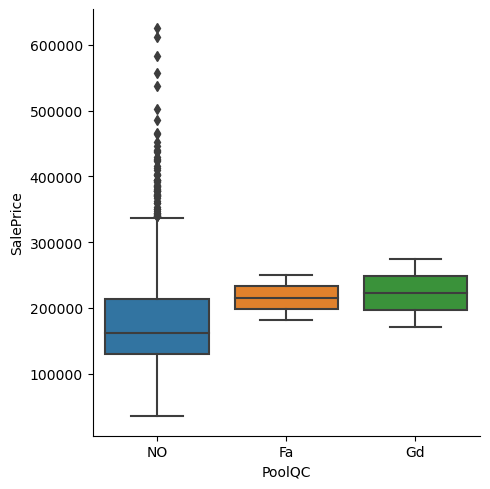

In [43]:
sns.catplot(data=train_set,x="PoolQC",y="SalePrice",kind="box")

In [44]:
train_set["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [45]:
train_set["MiscFeature"].fillna("NO",inplace=True)
test_set["MiscFeature"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\902890257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["MiscFeature"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


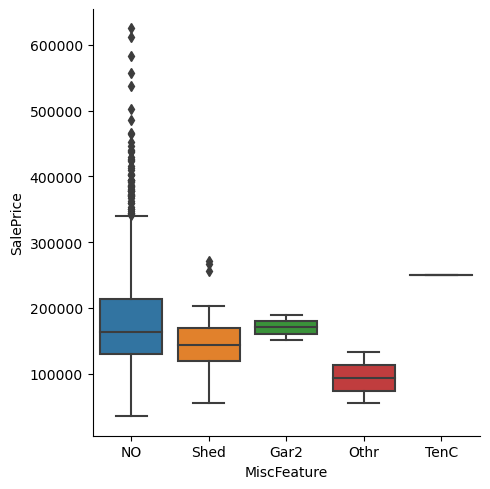

In [46]:
sns.catplot(data=train_set,x="MiscFeature",y="SalePrice",kind="box")

In [47]:
train_set["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [48]:
train_set["Alley"].fillna("NO",inplace=True)
test_set["Alley"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\2947628090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["Alley"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


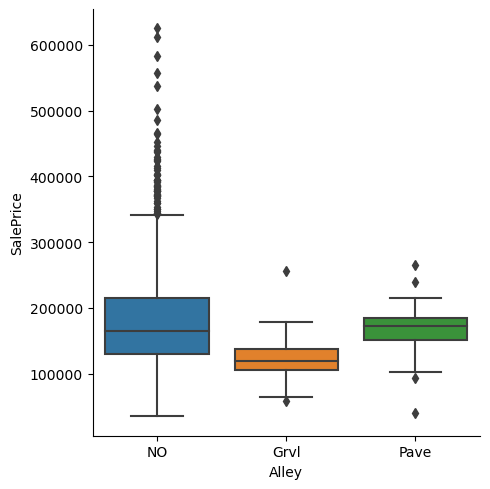

In [49]:
sns.catplot(data=train_set,x="Alley",y="SalePrice",kind="box")

In [50]:
train_set["Fence"].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [51]:
train_set["Fence"].fillna("NO",inplace=True)
test_set["Fence"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\2411321970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["Fence"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


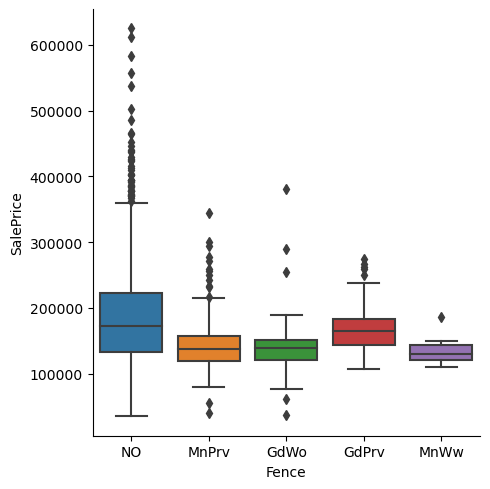

In [52]:
sns.catplot(data=train_set,x="Fence",y="SalePrice",kind="box")

In [53]:
train_set["MasVnrType"].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [54]:
train_set["MasVnrType"].fillna("NO",inplace=True)
test_set["MasVnrType"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\965429196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["MasVnrType"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


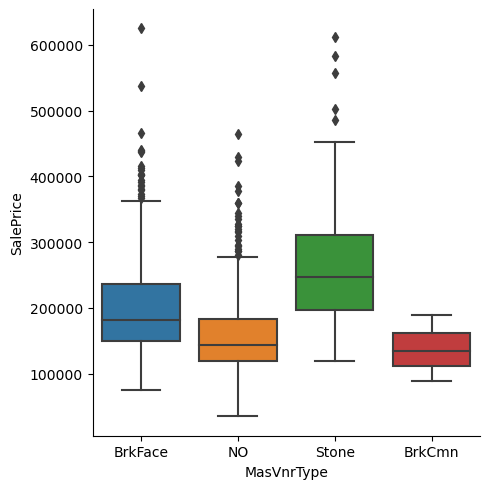

In [55]:
sns.catplot(data=train_set,x="MasVnrType",y="SalePrice",kind="box")

In [56]:
train_set["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [57]:
train_set["FireplaceQu"].fillna("NO",inplace=True)
test_set["FireplaceQu"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\1267140227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["FireplaceQu"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


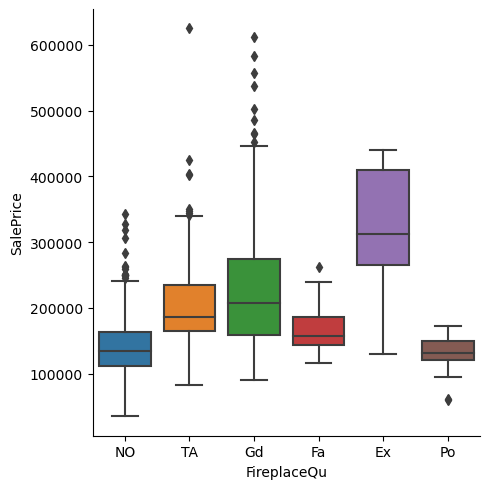

In [58]:
sns.catplot(data=train_set,x="FireplaceQu",y="SalePrice",kind="box")

In [59]:
train_set.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79.,  99.,  67.,
        83.,  43., 103., 174.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106.,  42.,  39., 104., 144., 114.,
       128., 149., 168., 182., 138., 152., 124.,  46.])

In [60]:
train_set["LotFrontage"].fillna(0,inplace=True)
test_set["LotFrontage"].fillna(0,inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\3492110912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["LotFrontage"].fillna(0,inplace=True)


In [61]:
train_set["GarageYrBlt"].corr(train_set["YearBuilt"])
# high correlation soo we can easly remove it becase the grage tear built and the house yrear built in the same year
# we will drop it

0.8289827595060575

In [62]:
train_set["GarageCond"].fillna("NO",inplace=True)
test_set["GarageCond"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\3927885413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["GarageCond"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


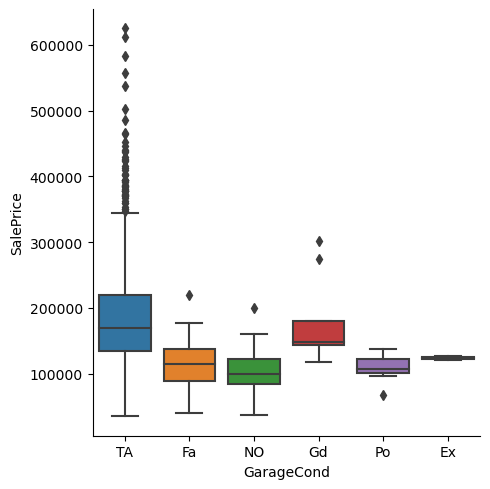

In [63]:
sns.catplot(data=train_set,x="GarageCond",y="SalePrice",kind="box")

In [64]:
train_set["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [65]:
train_set["GarageType"].fillna("NO",inplace=True)
test_set["GarageType"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\344774439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["GarageType"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


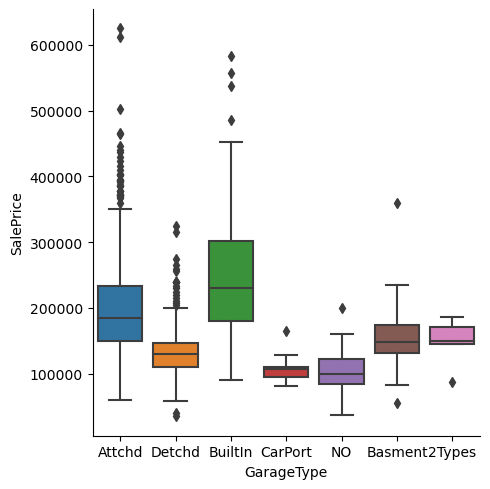

In [66]:
sns.catplot(data=train_set,x="GarageType",y="SalePrice",kind="box")

In [67]:
train_set["GarageFinish"].fillna("NO",inplace=True)
test_set["GarageFinish"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\1396854307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["GarageFinish"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


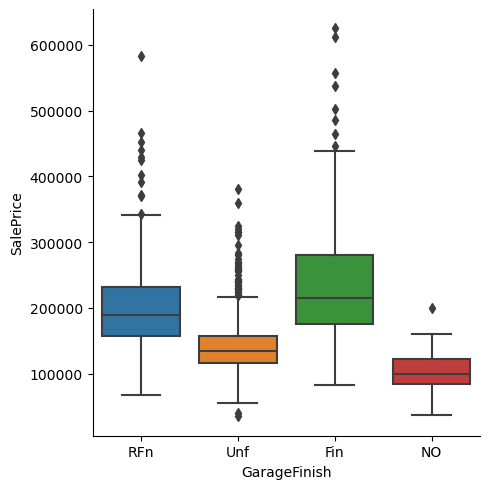

In [68]:
sns.catplot(data=train_set,x="GarageFinish",y="SalePrice",kind="box")

In [69]:
train_set["GarageQual"].fillna("NO",inplace=True)
test_set["GarageQual"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\2317810958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["GarageQual"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


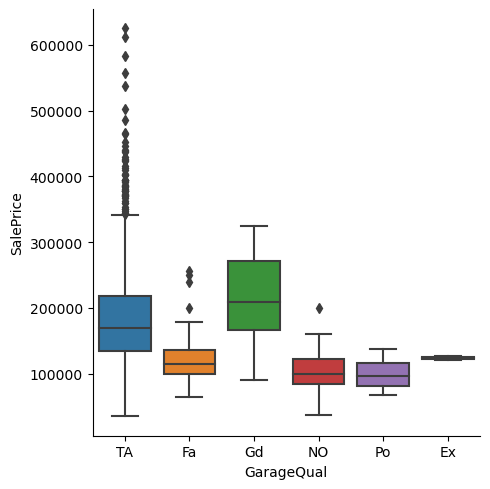

In [70]:
sns.catplot(data=train_set,x="GarageQual",y="SalePrice",kind="box")

In [71]:
train_set["MasVnrArea"].fillna(0,inplace=True)
test_set["MasVnrArea"].fillna(0,inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\1117616768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["MasVnrArea"].fillna(0,inplace=True)


In [72]:
train_set["BsmtFinType2"].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [73]:
train_set["BsmtFinType2"].fillna("Unf",inplace=True)
test_set["BsmtFinType2"].fillna("Unf",inplace=True)
#############

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\3830446580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["BsmtFinType2"].fillna("Unf",inplace=True)


In [74]:
train_set["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [75]:
train_set["BsmtExposure"].fillna("NO",inplace=True)
test_set["BsmtExposure"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\2625499574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["BsmtExposure"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


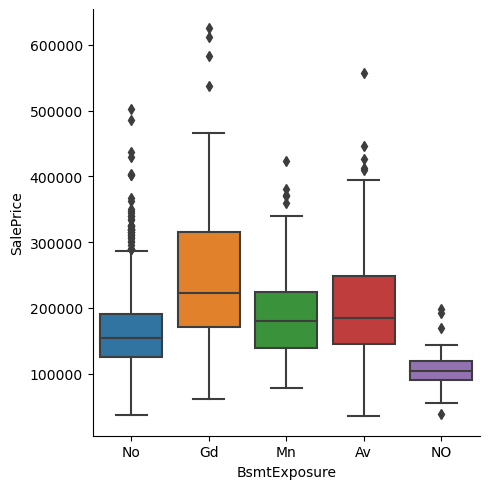

In [76]:
sns.catplot(data=train_set,x="BsmtExposure",y="SalePrice",kind="box")

In [77]:
train_set["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [78]:
train_set["BsmtQual"].fillna("NO",inplace=True)
test_set["BsmtQual"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\2113352780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["BsmtQual"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


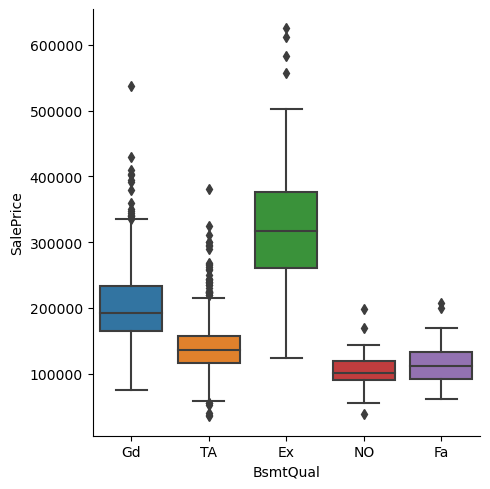

In [79]:
sns.catplot(data=train_set,x="BsmtQual",y="SalePrice",kind="box")

In [80]:
train_set["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [81]:
train_set["BsmtCond"].fillna("NO",inplace=True)
test_set["BsmtCond"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\4261799081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["BsmtCond"].fillna("NO",inplace=True)


In [82]:
train_set["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [83]:
train_set["BsmtFinType1"].fillna("NO",inplace=True)
test_set["BsmtFinType1"].fillna("NO",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\2133083159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["BsmtFinType1"].fillna("NO",inplace=True)


D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


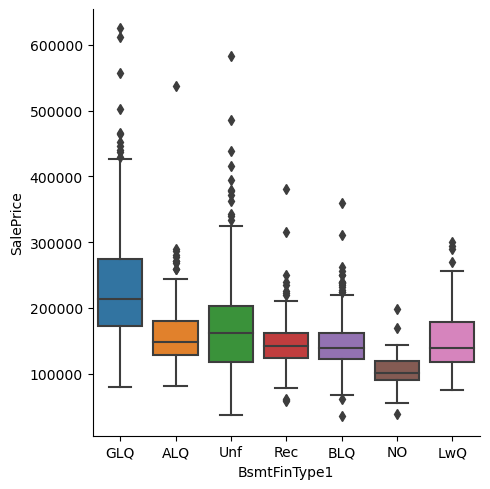

In [84]:
sns.catplot(data=train_set,x="BsmtFinType1",y="SalePrice",kind="box")

In [85]:
train_set["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [86]:
train_set["Electrical"].fillna("SBrkr",inplace=True)
test_set["Electrical"].fillna("SBrkr",inplace=True)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\203248883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set["Electrical"].fillna("SBrkr",inplace=True)


In [87]:
# GarageYrBlt	77  drop


In [88]:
pd.DataFrame(train_set.isnull().sum().sort_values(ascending=False)).head(25)

,0
GarageYrBlt,76
Id,0
CentralAir,0
GarageType,0
FireplaceQu,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0


In [89]:
train_set=train_set.drop(columns=["PoolQC","MiscFeature","Alley"
                                  ,"Fence","GarageYrBlt","GarageCond"
                                  ,"BsmtFinType2"])
test_set=test_set.drop(columns=["PoolQC","MiscFeature","Alley"
                                ,"Fence","GarageYrBlt","GarageCond"
                                ,"BsmtFinType2"])

In [90]:
# feature Engineering 

In [91]:
train_set.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3Ssn

In [92]:
train_set["houseage"]=train_set["YrSold"]-train_set["YearBuilt"]
test_set["houseage"]=test_set["YrSold"]-test_set["YearBuilt"]

In [93]:
train_set["houseremodelage"]=train_set["YrSold"]-train_set["YearRemodAdd"]
test_set["houseremodelage"]=test_set["YrSold"]-test_set["YearRemodAdd"]

In [94]:
train_set["totalsf"]=train_set["1stFlrSF"]+train_set["2ndFlrSF"]+train_set["BsmtFinSF1"]+train_set["BsmtFinSF2"]
test_set["totalsf"]=test_set["1stFlrSF"]+test_set["2ndFlrSF"]+test_set["BsmtFinSF1"]+test_set["BsmtFinSF2"]

In [95]:
train_set["totalarea"]=train_set["GrLivArea"]+train_set["TotalBsmtSF"]
test_set["totalarea"]=test_set["GrLivArea"]+test_set["TotalBsmtSF"]

In [96]:
train_set["totalbaths"]=train_set["BsmtFullBath"]+train_set["FullBath"] + 0.5 * train_set["BsmtHalfBath"]+train_set["HalfBath"]
test_set["totalbaths"]=test_set["BsmtFullBath"]+test_set["FullBath"] + 0.5 * test_set["BsmtHalfBath"]+test_set["HalfBath"]

In [97]:
train_set["totalporchsf"]=train_set["OpenPorchSF"]+train_set["3SsnPorch"]+train_set["EnclosedPorch"]+train_set["ScreenPorch"]+train_set["WoodDeckSF"]
test_set["totalporchsf"]=test_set["OpenPorchSF"]+test_set["3SsnPorch"]+test_set["EnclosedPorch"]+test_set["ScreenPorch"]+test_set["WoodDeckSF"]

In [98]:
train_set=train_set.drop(columns=["Id","YrSold","YearBuilt","YearRemodAdd",
                                  "1stFlrSF","2ndFlrSF","BsmtFinSF1",
                                  "BsmtFinSF2","GrLivArea",
                                 "TotalBsmtSF","BsmtFullBath","FullBath",
                                  "BsmtHalfBath","HalfBath","OpenPorchSF",
                                 "3SsnPorch","EnclosedPorch","ScreenPorch",
                                  "WoodDeckSF"])
test_set=test_set.drop(columns=["YrSold","YearBuilt","YearRemodAdd","1stFlrSF",
                                "2ndFlrSF","BsmtFinSF1","BsmtFinSF2","GrLivArea",
                                "TotalBsmtSF","BsmtFullBath","FullBath",
                                "BsmtHalfBath","HalfBath","OpenPorchSF", "3SsnPorch",
                                "EnclosedPorch","ScreenPorch","WoodDeckSF"])

<Axes: >

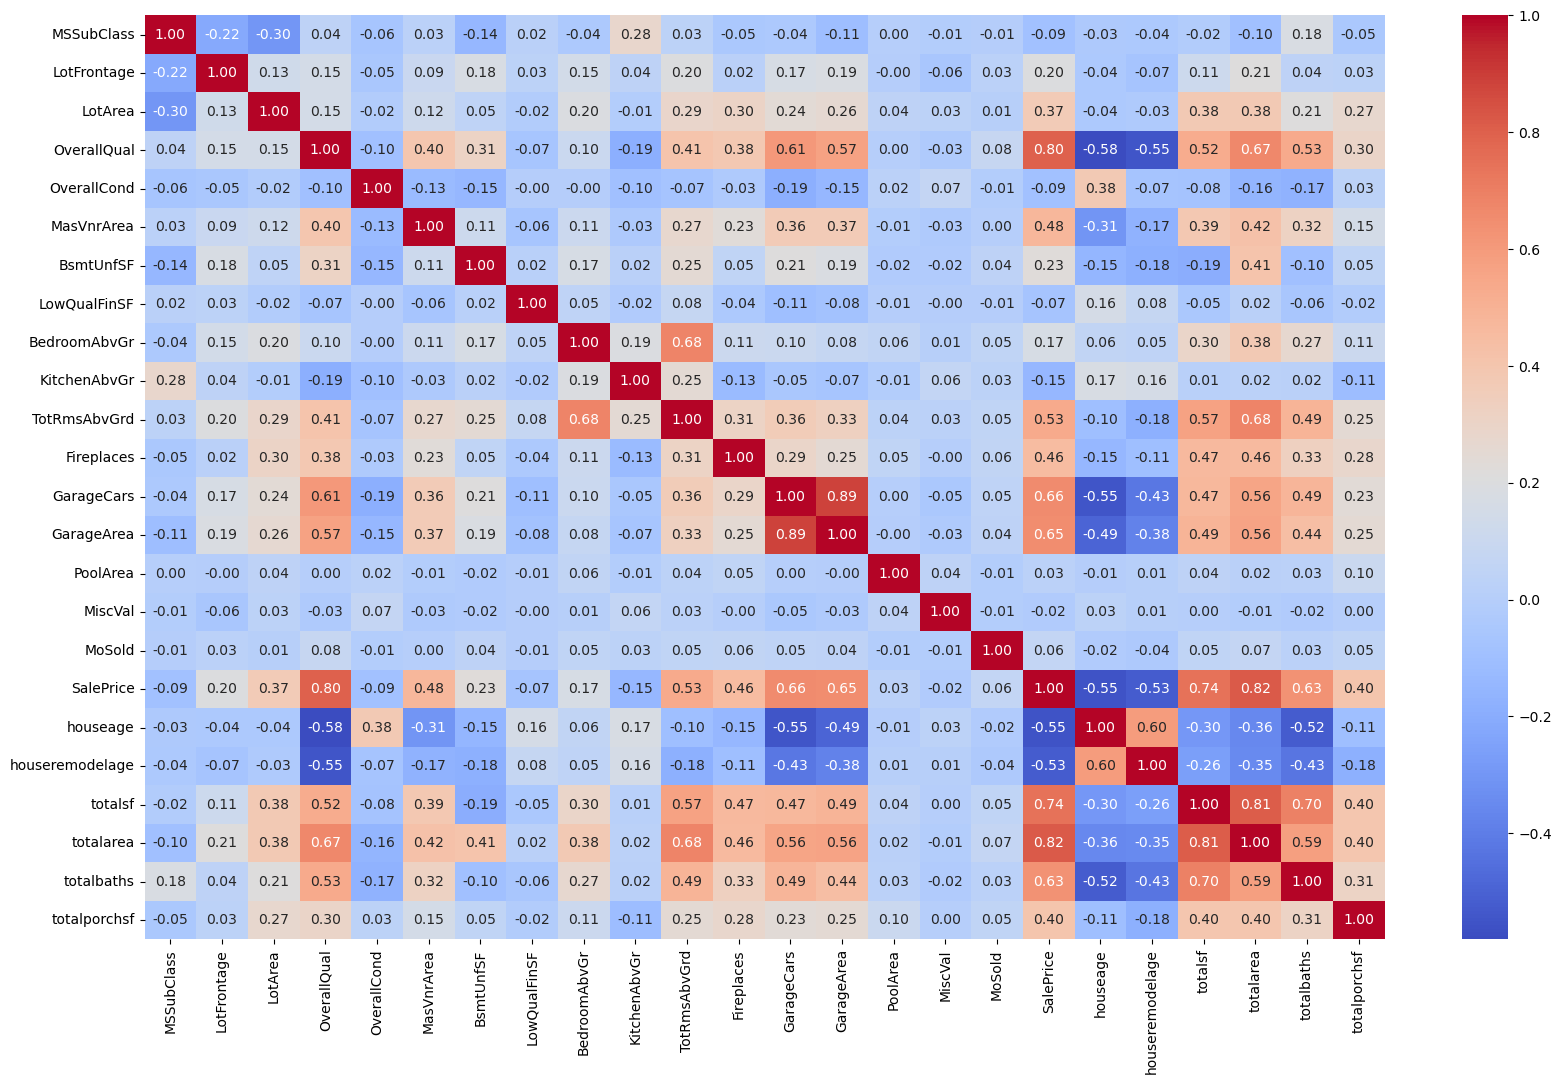

In [99]:
correalation_matrix=train_set.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correalation_matrix,annot=True ,cmap="coolwarm", fmt = ".2f")

In [100]:
# Drop GarageArea Or GrageCars
train_set=train_set.drop(columns=["GarageArea"])
test_set=test_set.drop(columns=["GarageArea"])

<Axes: >

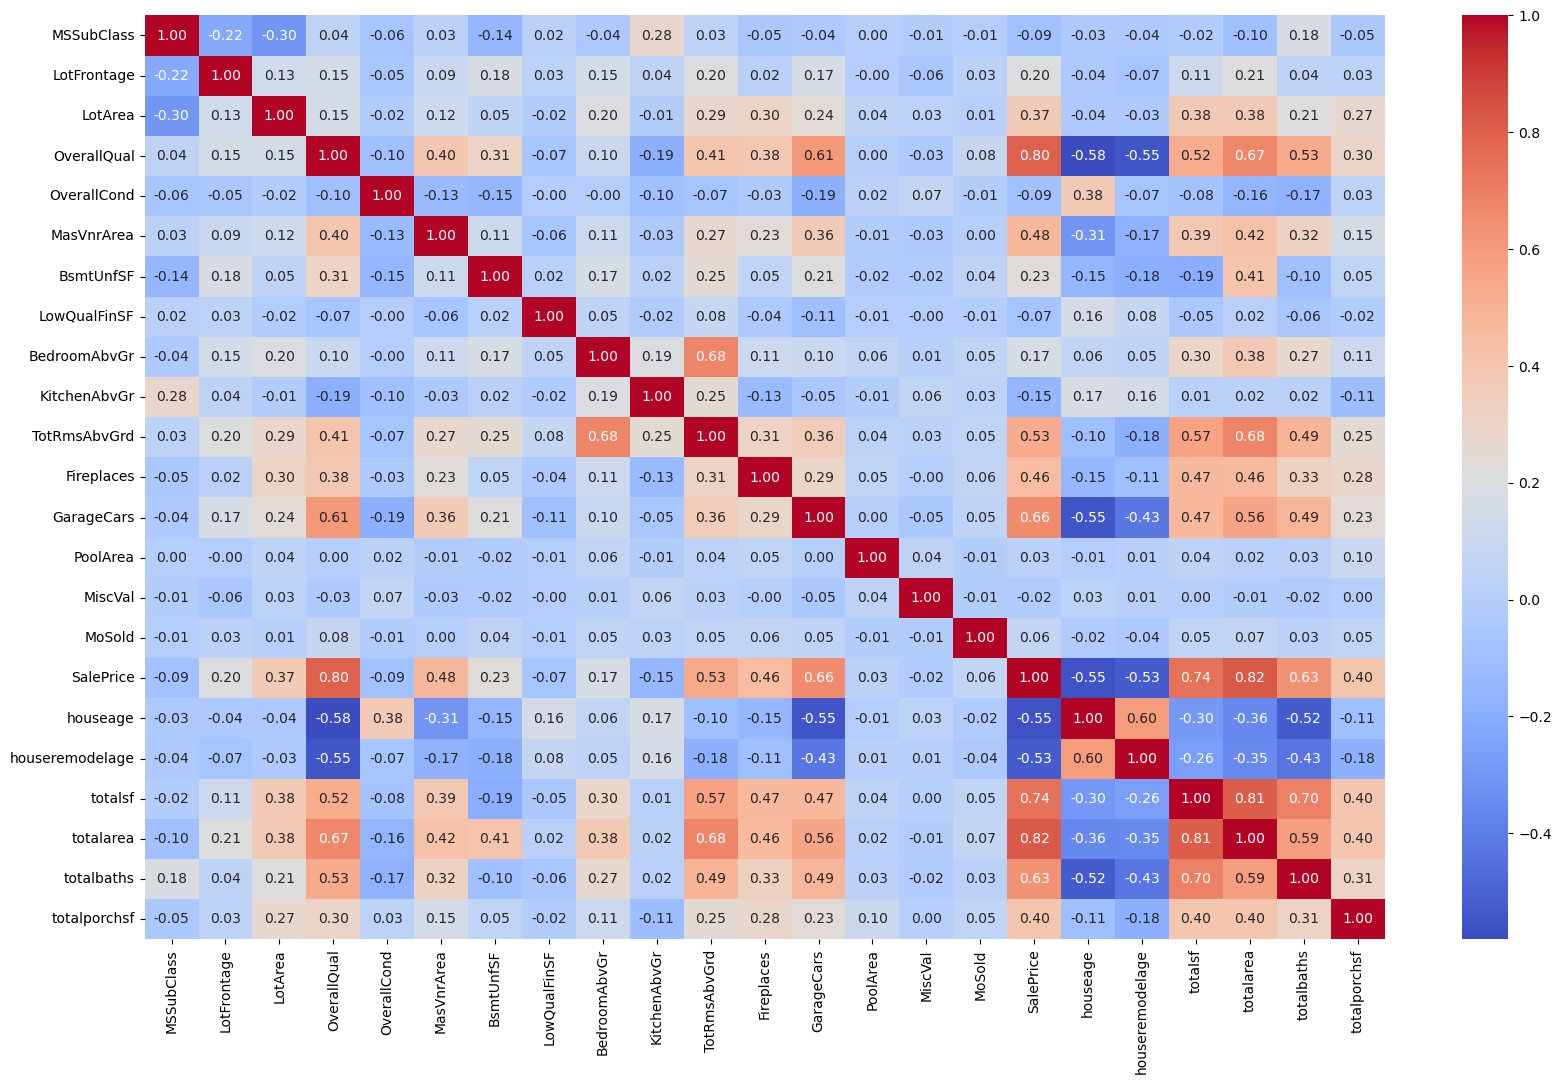

In [101]:
correalation_matrix=train_set.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correalation_matrix,annot=True ,cmap="coolwarm", fmt = ".2f")

<Axes: xlabel='SalePrice', ylabel='Count'>

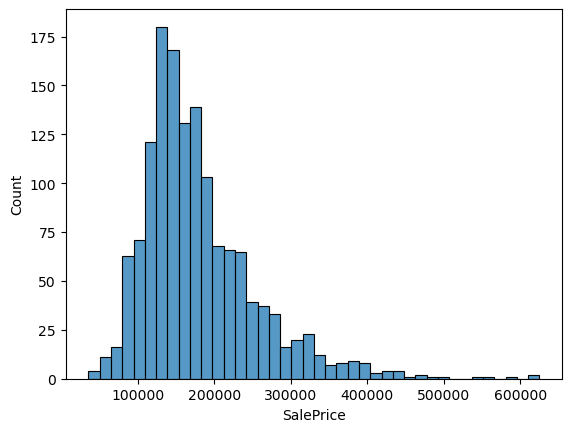

In [102]:
sns.histplot(train_set,x=train_set["SalePrice"])

In [103]:
train_set["SalePrice"]=np.log1p(train_set["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Count'>

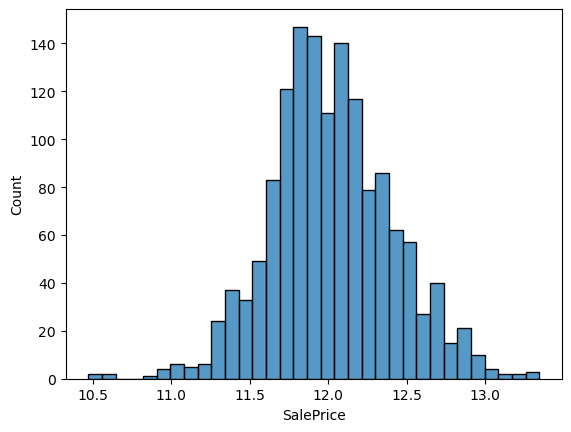

In [104]:
sns.histplot(train_set,x=train_set["SalePrice"])

In [105]:
len(train_set.columns)

60

In [106]:
nums_cols=train_set.select_dtypes(include=["int64","float64"]).columns
nums_cols=nums_cols.drop("SalePrice")

In [107]:
len(train_set.dtypes[train_set.dtypes!='object'])+len(train_set.dtypes[train_set.dtypes=='object'])

60

In [108]:
ode_cols = ['LotShape', 'LandContour','Utilities','LandSlope',  'BsmtQual',
            'BsmtFinType1',  'CentralAir',  'Functional', 
           'FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive', 
            'ExterCond', 'KitchenQual', 'BsmtExposure', 'HeatingQC','ExterQual', 'BsmtCond']

In [109]:
ohe_cols = ['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 
            'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 
           'MasVnrType','Foundation',  'Electrical',  'SaleType', 'MSZoning',
            'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']

In [110]:
# ##################

In [111]:
from sklearn.pipeline import Pipeline

In [112]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [113]:
num_pipeline=Pipeline([("impute",SimpleImputer(strategy="mean")),
                      ("scaler",StandardScaler())])

In [114]:
ode_pipeline=Pipeline([("impute",SimpleImputer(strategy="most_frequent")),
                      ("ode",OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

In [115]:
ohe_pipeline=Pipeline([("impute",SimpleImputer(strategy="most_frequent")),
                      ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [116]:
from sklearn.compose import ColumnTransformer

In [117]:
col_tran=ColumnTransformer([
    ("nums" , num_pipeline , nums_cols ),
    ("ode"  , ode_pipeline , ode_cols ),
    ("ohe"  , ohe_pipeline , ohe_cols )],
                          remainder="passthrough",
                          n_jobs=-1)

In [118]:
pipeline = Pipeline([
    ('preprocessing', col_tran)
])

In [119]:
X=train_set.drop("SalePrice",axis=1)
y=train_set["SalePrice"]

In [120]:
X_train_pre=pipeline.fit_transform(X)

In [121]:
X_train_pre

array([[ 0.07887505,  0.24496024, -0.28610364, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87291695,  0.70183977, -0.07084665, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07887505,  0.33633615,  0.23800033, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.31682305,  0.27541888, -0.17529308, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87291695,  0.33633615, -0.04894659, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87291695,  0.54954659, -0.00776699, ...,  0.        ,
         0.        ,  0.        ]])

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train , X_test , y_train , y_test = train_test_split(X_train_pre,y, test_size=0.2, random_state=42)
#180 good for lr

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
lr=LinearRegression()

In [126]:
lr.fit(X_train,y_train)

LinearRegression()

In [127]:
from sklearn.metrics import mean_squared_error
y_pred_lr=lr.predict(X_test)
mean_squared_error(y_pred_lr,y_test)

1.2149067358058217e+18

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
rfr= RandomForestRegressor(random_state=13)

In [130]:
param_grid_RFR = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 250, 500],
    'min_samples_split': [3, 5, 10]
}

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
rfr_cv = GridSearchCV(rfr, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [133]:
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 250, 500]},
             scoring='neg_mean_squared_error')

In [134]:
y_pred_rfr=rfr_cv.predict(X_test)
mean_squared_error(y_pred_rfr,y_test)

0.023193943279935066

In [135]:
from sklearn.linear_model import ElasticNet

In [136]:
elnet= ElasticNet()

In [137]:
param_grid_elnet={
     'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

In [138]:
elnet_cv=GridSearchCV(elnet,param_grid_elnet,scoring="neg_mean_squared_error",n_jobs=-1)

In [139]:
elnet_cv.fit(X_train,y_train)

GridSearchCV(estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='neg_mean_squared_error')

In [140]:
elnet_cv.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [141]:
y_pred_elnet=elnet_cv.predict(X_test)
mean_squared_error(y_pred_elnet,y_test)

0.020213443698905167

In [142]:
from sklearn.ensemble import GradientBoostingRegressor

In [143]:
GBR=GradientBoostingRegressor()

In [144]:
param_grid_GBR={'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],}

In [145]:
GBR_cv=GridSearchCV(GBR,param_grid_GBR,scoring="neg_mean_squared_error",n_jobs=-1)

In [146]:
GBR_cv.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [147]:
y_pred_GBR=GBR_cv.predict(X_test)
mean_squared_error(y_pred_GBR,y_test)

0.018557099618923618

In [151]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

In [152]:
mean_squared_error(y_pred_xgb,y_test)

0.020177848129016265

In [154]:
y_test

168     12.119975
615     11.831386
557     11.589896
65      12.666660
639     12.485831
          ...    
1387    11.820418
268     11.699413
1445    11.767575
501     12.331387
1102    11.813037
Name: SalePrice, Length: 288, dtype: float64

In [179]:
from sklearn.ensemble import VotingRegressor

In [261]:
voting=VotingRegressor(estimators=[("lr",lr),
                                   ("rfr_cv",rfr_cv.best_estimator_),
                                   ("elnet_cv",elnet_cv.best_estimator_),
                                   ("GBR_cv",GBR_cv.best_estimator_),
                                   ("xgb_reg",xgb_reg)])

In [262]:
voting.fit(X_train_pre,y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rfr_cv',
                             RandomForestRegressor(max_depth=15,
                                                   min_samples_split=3,
                                                   random_state=13)),
                            ('elnet_cv', ElasticNet(alpha=0.1, l1_ratio=0.1)),
                            ('GBR_cv',
                             GradientBoostingRegressor(n_estimators=200)),
                            ('xgb_reg',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=No...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))])

In [263]:
y_pred_vr=voting.predict(X_test)
mean_squared_error(y_pred_vr,y_test)

0.004514817331991609

In [264]:
test_set_pre = pipeline.transform(test_set)

In [267]:
y_final = np.exp(voting.predict(test_set_pre))

final = test_set[['Id']]
final['SalePrice'] = y_final 
final=final.replace([np.inf],np.NAN)
final=final.replace(np.NAN,final['SalePrice'].mean())

final.to_csv('D:\courses\data science all\project\housing prices\submission.csv', index=False)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\1559005589.py:1: RuntimeWarning: overflow encountered in exp
  y_final = np.exp(voting.predict(test_set_pre))
C:\Users\Darwish\AppData\Local\Temp\ipykernel_10700\1559005589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['SalePrice'] = y_final
